# Experimental Design in Python

## Experimental Design Preliminaries

### Setting up experiments

#### Non-random assignment of subjects
An agricultural firm is conducting an experiment to measure how feeding sheep different types of grass affects their weight. They have asked for your help to properly set up the experiment. One of their managers has said you can perform the subject assignment by taking the top 250 rows from the DataFrame and that should be fine.

Your task is to use your analytical skills to demonstrate why this might not be a good idea. Assign the subjects to two groups using non-random assignment (the first 250 rows) and observe the differences in descriptive statistics.

You have received the DataFrame, weights which has a column containing the weight of the sheep and a unique id column.

numpy and pandas have been imported as np and pd, respectively.

In [2]:
import numpy as np
import pandas as pd

In [2]:
df_chick_weights = pd.read_csv(r'.\data\chick_weight.csv')
df_chick_weights.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [3]:
# Non-random assignment
group1_non_rand = df_chick_weights.loc[:289,['weight']]
group2_non_rand = df_chick_weights.loc[289:,['weight']]

# Compare descriptive statistics of groups
compare_df_non_rand = \
    pd.concat(
        [group1_non_rand['weight'].describe(),
        group2_non_rand['weight'].describe()],
        axis=1
    )
compare_df_non_rand.columns = ['group1', 'group2']

# Print to assess
print(compare_df_non_rand)

           group1      group2
count  290.000000  289.000000
mean   106.831034  137.145329
std     61.521165   76.707912
min     35.000000   39.000000
25%     59.000000   69.000000
50%     89.000000  126.000000
75%    141.750000  186.000000
max    331.000000  373.000000


#### Random assignment of subjects
Having built trust from your last work with the agricultural firm, you have been given the task of properly setting up the experiment.

Use your knowledge of best practice experimental design set up to assign the sheep to two even groups of 250 each.

In [4]:
# Randomly assign half
group1_random = df_chick_weights.sample(
    frac=0.5,
    random_state=42,
    replace=False
)

# Create second assignment
group2_random = df_chick_weights.drop(
    group1_random.index
)

# Compare assignments
compare_df_random = pd.concat(
    [group1_random['weight'].describe(),
    group2_random['weight'].describe()],
    axis=1
)
compare_df_random.columns = ['group1', 'group2']
print(compare_df_random)

           group1      group2
count  289.000000  289.000000
mean   120.044983  123.591696
std     70.089685   72.118725
min     35.000000   39.000000
25%     62.000000   63.000000
50%    105.000000  103.000000
75%    163.000000  164.000000
max    373.000000  361.000000


### Experimental data setup

#### Test

In [5]:
df_chick_weights.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


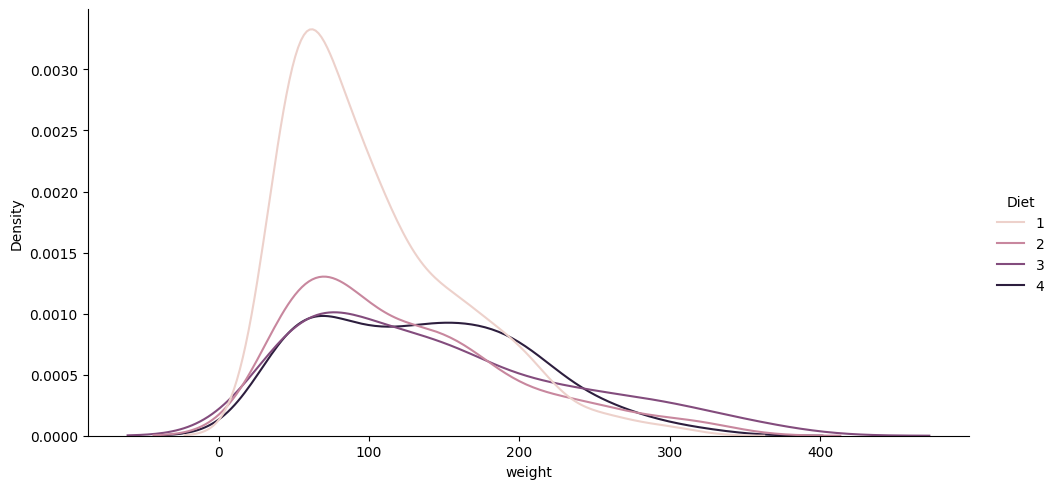

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.displot(
    data=df_chick_weights,
    x='weight',
    hue='Diet',
    kind='kde',
    aspect=2
)
plt.show();

#### Blocking experimental data

You are working with a manufacturing firm that wants to conduct some experiments on worker productivity. Their dataset only contains 100 rows, so it's important that experimental groups are balanced.

This sounds like a great opportunity to use your knowledge of blocking to assist them. They have provided a productivity_subjects DataFrame. Split the provided dataset into two even groups of 50 entries each.

In [7]:
df_athletic_perf = pd.read_csv(r'.\data\athletic_perf.csv')
productivity_subjects=df_athletic_perf[['Athlete_ID']]
productivity_subjects.shape

(300, 1)

In [8]:
# Randomly assign half
block_1 = productivity_subjects.sample(
    frac=0.5,
    random_state=42,
    replace=False)

# Set the block column
block_1['block'] = 1

# Create second assignment and label
block_2 = productivity_subjects.drop(
    block_1.index
)
block_2['block'] = 2

# Concatenate and print
productivity_combined = pd.concat(
    [block_1, block_2], axis=0)
print(productivity_combined['block'].value_counts())

block
1    150
2    150
Name: count, dtype: int64


### Stratifying an experiment

You are working with a government organization that wants to undertake an experiment around how some particular government policies impact the net wealth of individuals in a number of areas.

They have approached you to help set up the experimental design. They have warned you that there is likely to be a small group of users who already have high net wealth and are concerned that this group might overshadow any experimental outcome observed. You know just what to do!

Use your knowledge of experimental design to undertake block randomization, stratifying by the high_wealth column in the provided wealth_data DataFrame. There are 2000 rows in the DataFrame with 200 high net wealth subjects (high_wealth is 1).

In [9]:
df_athletic_perf['Training_Program'].unique()

array(['Strength', 'HIIT', 'Endurance'], dtype=object)

In [10]:
df_athletic_perf.head()

,Athlete_ID,Training_Program,Diet_Type,Initial_Fitness,Performance_Inc
0,1,Strength,Keto,Low,8.749524
1,2,HIIT,Plant-Based,High,9.452781
2,3,Strength,Plant-Based,Low,13.928506
3,4,Strength,Plant-Based,High,9.605557
4,5,HIIT,Plant-Based,Low,7.547894


In [11]:
# Create the first block
strata_1 = df_athletic_perf[df_athletic_perf['Initial_Fitness'] == 'High']
strata_1['Block'] = 1

# Create two groups assigning to Treatment or Control
strata_1_g1 = strata_1.sample(frac=0.5, replace=False)
strata_1_g1['T_C'] = 'T'
strata_1_g2 = strata_1.drop(strata_1_g1.index)
strata_1_g2['T_C'] = 'C'

# Create the second block and assign groups
strata_2 = df_athletic_perf[df_athletic_perf['Initial_Fitness'] == 'Low']
strata_2['Block'] = 2

strata_2_g1 = strata_2.sample(frac=0.5, replace=False)
strata_2_g1['T_C'] = 'T'
strata_2_g2 = strata_2.drop(strata_2_g1.index)
strata_2_g2['T_C'] = 'C'

# Concatenate the grouping work
df_athletic_perf_stratified = pd.concat([strata_1_g1, strata_1_g2, strata_2_g1, strata_2_g2])
df_athletic_perf_stratified.head()
print(df_athletic_perf_stratified.groupby(['Block','T_C', 'Initial_Fitness']).size())

Block  T_C  Initial_Fitness
1      C    High               44
       T    High               44
2      C    Low                57
       T    Low                56
dtype: int64


### Normal data

#### Normal

In [12]:
df_athletic_perf.head(3)

,Athlete_ID,Training_Program,Diet_Type,Initial_Fitness,Performance_Inc
0,1,Strength,Keto,Low,8.749524
1,2,HIIT,Plant-Based,High,9.452781
2,3,Strength,Plant-Based,Low,13.928506


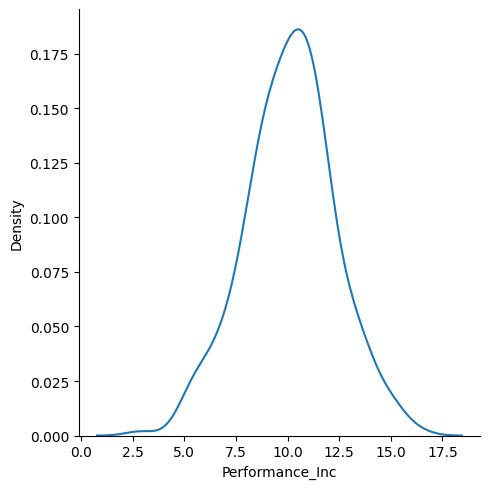

In [13]:
sns.displot(
    data=df_athletic_perf,
    x='Performance_Inc',
    kind='kde'
)
plt.show();

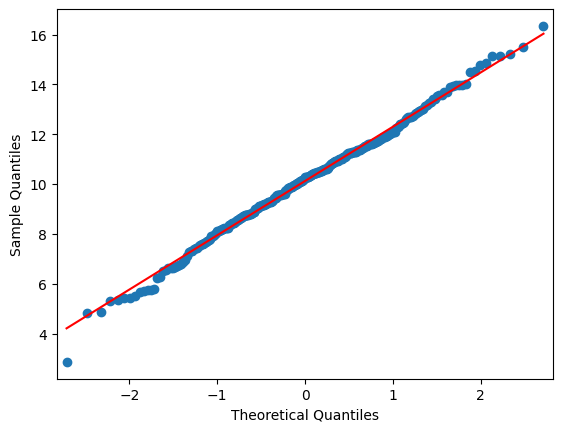

In [14]:
import statsmodels.graphics.gofplots as smgg
import scipy.stats.distributions as ssd

smgg.qqplot(
    df_athletic_perf['Performance_Inc'],
    line='s',
    dist=ssd.norm
)
plt.show();

#### Shapiro-Wilk Test

In [15]:
import scipy.stats as spst
alpha = 0.05
stat, p = spst.shapiro(df_athletic_perf['Performance_Inc'])
print(f'p: {round(p,4)}; test stat: {round(stat, 4)}')

p: 0.6787; test stat: 0.9961


#### Anderson-Darling Test

In [16]:
result = spst.anderson(x=df_athletic_perf['Performance_Inc'], dist='norm')
print(f'result: {round(result.statistic, 4)}\nSignificance: {result.significance_level}\nCritical: {result.critical_values}')

result: 0.3754
Significance: [15.  10.   5.   2.5  1. ]
Critical: [0.569 0.648 0.777 0.906 1.078]


#### Visual normality in an agricultural experiment

You have been contracted by an agricultural firm conducting an experiment on 50 chickens, divided into four groups, each fed a different diet. Weight measurements were taken every second day for 20 days.

You'll analyze chicken_data to assess normality, which will determine the suitability of parametric statistical tests, beginning with a visual examination of the data distribution.

In [18]:
import seaborn as sns
import pandas as pd
import statsmodels.graphics.gofplots as smgg

In [19]:
df_chick_weights.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


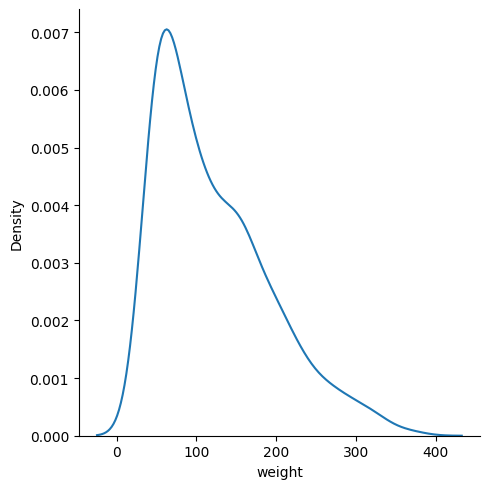

In [20]:
# Plot the distribution of the chickens' weight
sns.displot(data=df_chick_weights, x='weight', kind='kde')
plt.show()

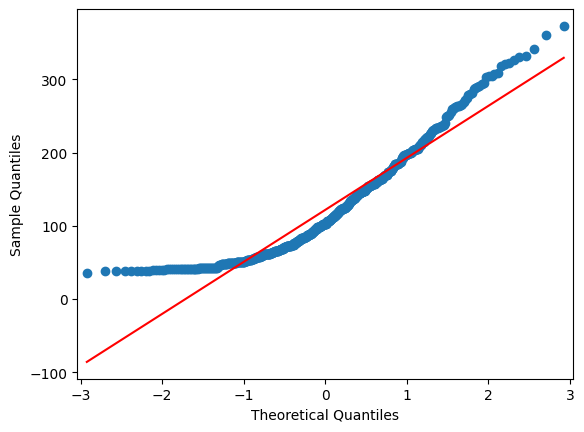

In [21]:
smgg.qqplot(
    df_chick_weights['weight'],
    line='s',
    dist=ssd.norm
)
plt.show();

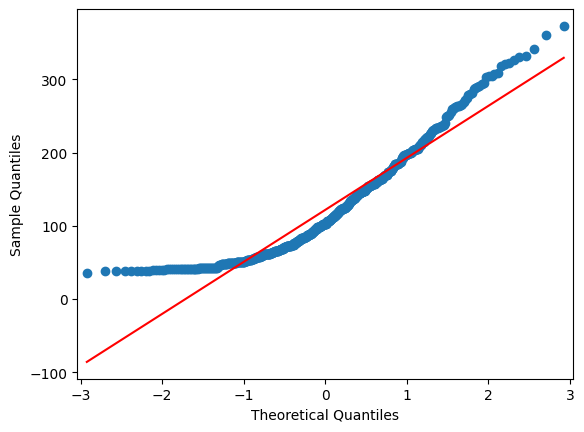

In [22]:
smgg.qqplot(
    df_chick_weights['weight'],
    line='s'
)
plt.show();

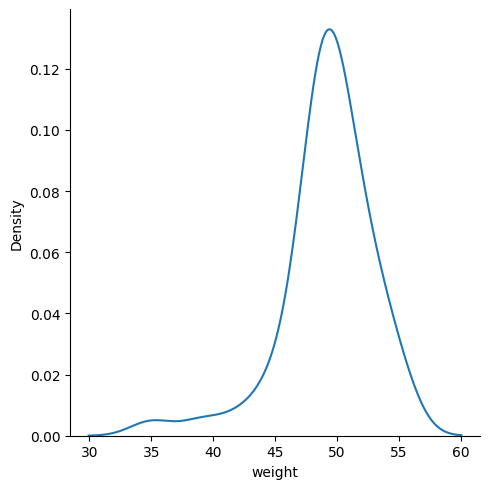

In [23]:
# Subset the data
subset_data = df_chick_weights[df_chick_weights['Time'] == 2]

# Repeat the plotting
sns.displot(data=subset_data, x='weight', kind=kde)
plt.show();

#### Analytical normality in an agricultural experiment

In [24]:
# Shapiro-Wilk Test
alpha = 0.05
stat, p = spst.shapiro(df_chick_weights['weight'])
print(f'p: {round(p,4)}; test stat: {round(stat, 4)}')

p: 0.0; test stat: 0.9087


In [26]:
# Anderson-Darling Test
result = spst.anderson(x=df_chick_weights['weight'], dist='norm')
print(f'result: {round(result.statistic, 4)}\nSignificance: {result.significance_level}\nCritical: {result.critical_values}')

result: 14.6868
Significance: [15.  10.   5.   2.5  1. ]
Critical: [0.572 0.652 0.782 0.912 1.085]


## Experimental Design Techniques

### Factorial designs: principles and applications

In [27]:
import pandas as pd
marketing_data = pd.read_feather(r'./data/marketing_data.feather')
marketing_data.head()

,Messaging_Style,Time_of_Day,Click_Through_Rate,Conversions
0,Casual,Morning,0.640465,500
1,Formal,Evening,0.698533,598
2,Casual,Morning,0.257834,234
3,Casual,Evening,0.922971,602
4,Casual,Morning,0.476893,314


In [28]:
marketing_pivot =\
  pd.pivot_table(
    marketing_data,
    values='Conversions',
    index='Messaging_Style',
    columns='Time_of_Day',
    aggfunc='mean'
)
print(marketing_pivot)

Time_of_Day         Evening     Morning
Messaging_Style                        
Casual           402.329004  401.133891
Formal           432.913043  411.096000


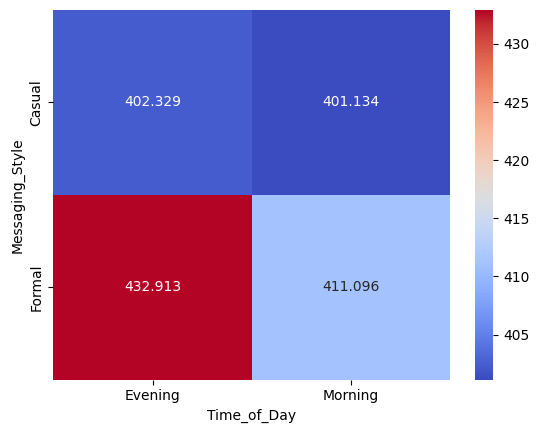

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize interactions with a heatmap
sns.heatmap(
    marketing_pivot,
    annot=True,
    cmap='coolwarm',
    fmt='g')

plt.show()

### Randomized block design: controlling variance

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
athletes = pd.read_csv(r'.\data\athletic_perf.csv')
athletes.head(3)

,Athlete_ID,Training_Program,Diet_Type,Initial_Fitness,Performance_Inc
0,1,Strength,Keto,Low,8.749524
1,2,HIIT,Plant-Based,High,9.452781
2,3,Strength,Plant-Based,Low,13.928506


In [32]:
athletes['Initial_Fitness'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [33]:
athletes.groupby(by='Initial_Fitness').apply(
  lambda x: x.sample(frac=1)
)

Athlete_ID Training_Program     Diet_Type  \
Initial_Fitness                                                  
High            67           68        Endurance          Keto   
                130         131         Strength          Keto   
                205         206         Strength   Plant-Based   
                69           70             HIIT          Keto   
                191         192        Endurance  High-Protein   
...                         ...              ...           ...   
Medium          298         299        Endurance          Keto   
                183         184             HIIT  High-Protein   
                111         112        Endurance  High-Protein   
                255         256         Strength  High-Protein   
                228         229         Strength  High-Protein   

                    Initial_Fitness  Performance_Inc  
Initial_Fitness                                       
High            67             High         5.722399  
                130            High        12.660877  
                205            High        11.843269  
                69             High        13.967984  
                191            High        12.930780  
...                             ...              ...  
Medium          298          Medium         5.761285  
                183          Medium         8.178884  
                111          Medium        12.108790  
                255          Medium         9.555211  
                228          Medium        12.734741  

[300 rows x 5 columns]

In [34]:
athletes.groupby(by='Initial_Fitness').apply(
  lambda x: x.sample(frac=1)
).reset_index(drop=True)

,Athlete_ID,Training_Program,Diet_Type,Initial_Fitness,Performance_Inc
0,235,HIIT,Plant-Based,High,9.341338
1,94,Strength,Plant-Based,High,11.649800
2,218,Strength,Keto,High,11.956586
3,237,Endurance,Plant-Based,High,9.048939
4,97,HIIT,High-Protein,High,10.500381
...,...,...,...,...,...
295,253,Strength,Plant-Based,Medium,11.234780
296,60,Strength,Plant-Based,Medium,10.531911
297,133,HIIT,Plant-Based,Medium,11.436197
298,224,Endurance,Keto,Medium,8.198934


In [35]:
blocks = athletes.groupby(by='Initial_Fitness').apply(
  lambda x: x.sample(frac=1)
).reset_index(drop=True)

In [36]:
blocks['Treatment'] = np.random.choice(
  ['Test_1', 'Test_2', 'Test_3'],
  size=len(blocks)
)
blocks.sample(6)

,Athlete_ID,Training_Program,Diet_Type,Initial_Fitness,Performance_Inc,Treatment
245,259,Strength,Keto,Medium,11.900357,Test_1
159,163,Endurance,Plant-Based,Low,9.869045,Test_1
214,82,HIIT,Keto,Medium,9.621585,Test_1
60,15,Endurance,Keto,High,10.800438,Test_3
165,41,HIIT,Plant-Based,Low,9.977545,Test_2
156,172,Endurance,High-Protein,Low,10.554363,Test_3


In [37]:
blocks[['Initial_Fitness', 'Treatment']].value_counts().sort_index()

Initial_Fitness  Treatment
High             Test_1       24
                 Test_2       27
                 Test_3       37
Low              Test_1       36
                 Test_2       38
                 Test_3       39
Medium           Test_1       31
                 Test_2       33
                 Test_3       35
Name: count, dtype: int64

<Axes: xlabel='Initial_Fitness', ylabel='Performance_Inc'>

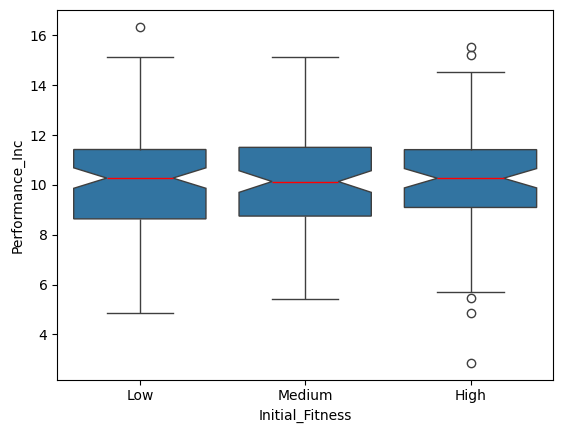

In [38]:
sns.boxplot(
  data=blocks
  , x='Initial_Fitness'
  , y='Performance_Inc'
  , notch=True
  , medianprops={'color':'r'}
  , order=['Low', 'Medium', 'High']
)

<Axes: xlabel='Initial_Fitness', ylabel='Performance_Inc'>

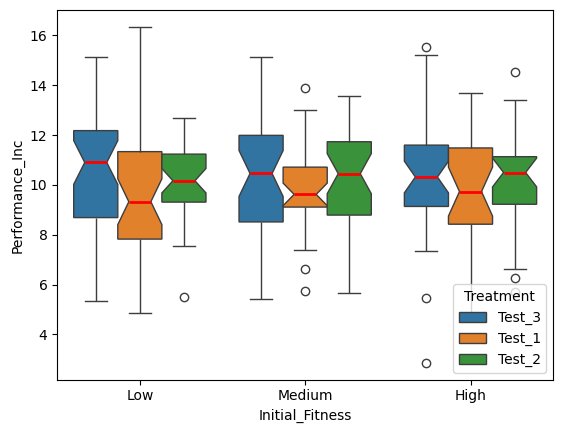

In [39]:
sns.boxplot(
  data=blocks
  , x='Initial_Fitness'
  , y='Performance_Inc'
  , hue='Treatment'
  , notch=True
  , medianprops={'color':'r', 'linewidth':2}
  , order=['Low', 'Medium', 'High']
)

In [40]:
# Perform the within blocks ANOVA, first grouping by block
import scipy.stats as scst
block_annova = blocks.groupby('Initial_Fitness').apply(
  lambda x: scst.f_oneway(
    x[x['Treatment']=='Test_1']['Performance_Inc']
    , x[x['Treatment']=='Test_2']['Performance_Inc']
    , x[x['Treatment']=='Test_3']['Performance_Inc']
  )
)
block_annova

Initial_Fitness
High         (0.23460085057728, 0.7913968558999119)
Low        (1.7678597131045488, 0.1755130004678123)
Medium    (0.43779381238008214, 0.6467409988133308)
dtype: object

### Covariate adjustment in experimental design

<b>Covariates:</b> Variables in datasets that affect experiment results but are not primary focus

<li> Importance in reducing confounding
<li> Impact on precision and validity of results <br>

<b>Covariate adjustment with chick growth</b><br>
Imagine studying in agricultural science the growth patterns of chicks under various dietary regimens. The data from this study sheds light on the intricate relationship between their respective diets and the consequent impact on their weight. This data includes weight measurements of chicks at different ages, allowing for an exploration of covariate adjustment. age serves as a covariate, potentially influencing the outcome variable: the weight of the chicks.

DataFrames exp_chick_data, the experimental data, and cov_chick_data, the covariate data, have been loaded, along with the following libraries:

In [50]:
import pandas as pd
import numpy as np
import statsmodels as sm
import statsmodels.formula as smf
import statsmodels.formula.api as smfa
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df_chick_weights.shape

(578, 4)

In [43]:
df_chick_weights.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [44]:
exp_chick_data = df_chick_weights[['Chick', 'weight', 'Diet']]
cov_chick_data = df_chick_weights[['Chick', 'Time']]

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     140.9
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           1.12e-60
Time:                        14:27:29   Log-Likelihood:                -38608.
No. Observations:                6818   AIC:                         7.722e+04
Df Residuals:                    6815   BIC:                         7.724e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.0678      2.275     41.342      0.0

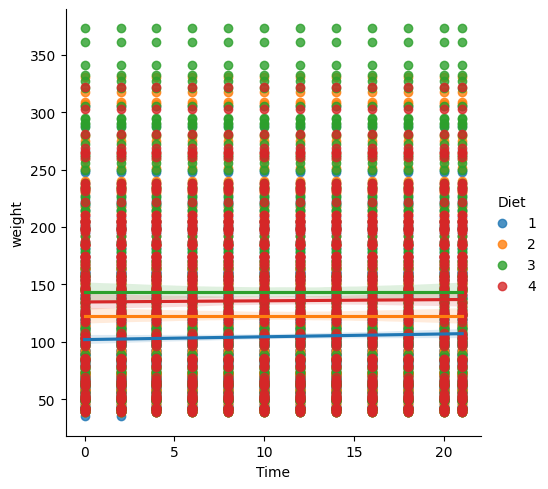

In [51]:
# Join experimental and covariate data
merged_chick_data = \
    pd.merge(
        exp_chick_data,
        cov_chick_data,
        on='Chick'
    )

# Perform ANCOVA with Diet and Time as predictors
model = \
    smfa.ols(
        'weight ~ Diet + Time',
        data=merged_chick_data
    ).fit()

# Print a summary of the model
print(model.summary())

# Visualize Diet effects with Time adjustment
sns.lmplot(
    x='Time',
    y='weight',
    hue='Diet',
    data=merged_chick_data)
plt.show()

You've successfully merged the experimental and covariate data to create a comprehensive dataset, then adeptly performed an ANCOVA, incorporating both 'Diet' and 'Time' as predictors. The visualization further clarifies how diet influences weight over time. It looks like 'Time' might not be as meaningful since the lines are all close to parallel, and the large p-value in the summary also corresponds to the 'Time' coefficient!

## Analyzing Experimental Data: Statistical Tests and Power

### Choosing the right statistical test

In [52]:
df_athletic_perf.head()

,Athlete_ID,Training_Program,Diet_Type,Initial_Fitness,Performance_Inc
0,1,Strength,Keto,Low,8.749524
1,2,HIIT,Plant-Based,High,9.452781
2,3,Strength,Plant-Based,Low,13.928506
3,4,Strength,Plant-Based,High,9.605557
4,5,HIIT,Plant-Based,Low,7.547894


In [54]:
df_athletic_perf.sample(n=5)

,Athlete_ID,Training_Program,Diet_Type,Initial_Fitness,Performance_Inc
97,98,Strength,Keto,Low,11.611471
23,24,Endurance,Keto,Low,7.417928
207,208,Strength,Keto,Medium,11.903028
51,52,HIIT,Plant-Based,Low,11.663636
60,61,Endurance,High-Protein,High,9.573055


#### T Test


Comparing two groups of training types ('HIIT' & 'Endurance') to see if these have any statistically significant variation on 'Performance_Inc'

In [56]:
group1 = df_athletic_perf[df_athletic_perf['Training_Program']=='HIIT']['Performance_Inc']
group2 = df_athletic_perf[df_athletic_perf['Training_Program']=='Endurance']['Performance_Inc']
t_stat, p_val = scst.ttest_ind(group1, group2)
print(f"T-statistics: {t_stat}, P-value: {p_val}")

T-statistics: 0.20671020082912311, P-value: 0.8364563849070619


p_val > $\alpha$ insufficient evidence of a difference in means. So statistically insignificant

#### One-way ANOVA

Comparing means across multiple (>2) groups.<br>
<b>Assumption:</b> equal variances among groups

In [60]:
program_types = list(df_athletic_perf['Training_Program'].unique())
groups = [
    df_athletic_perf[df_athletic_perf['Training_Program']==program]['Performance_Inc']
    for program in program_types
]
f_stat, p_val = scst.f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-Value: {p_val}")

F-statistic: 1.5270022393256704, P-Value: 0.21888590090505408


p_val > $\alpha$ ==> insufficient evidence of a difference in means

#### Chi-squared Test

<li> Testing relationship between categorical variables
<li> No assumptions about distributions

In [62]:
contingency_table = \
    pd.crosstab(
        df_athletic_perf['Training_Program'],
        df_athletic_perf['Diet_Type']
    )
chi2_stat, p_val, dof, expected = scst.chi2_contingency(contingency_table)
print(f'Chi2-statistic: {chi2_stat}, P-value: {p_val}')

Chi2-statistic: 2.154450885821988, P-value: 0.7073764021451128


p_val > $\alpha$ ==> insufficient evidence of an association

#### Choosing the right test: petrochemicals

In a chemistry research lab, scientists are examining the efficiency of three well-known catalysts—Palladium (Pd), Platinum (Pt), and Nickel (Ni)—in facilitating a particular reaction. Each catalyst is used in a set of identical reactions under controlled conditions, and the time taken for each reaction to reach completion is meticulously recorded. Your goal is to compare the mean reaction times across the three catalyst groups to identify which catalyst, if any, has a significantly different reaction time.

The data is available in the chemical_reactions DataFrame. pandas as pd, numpy as np, and the following functions have been loaded as well:

In [64]:
chemical_reactions = pd.read_csv('.\data\chemical_reactions.csv')
chemical_reactions.head(2)

,Catalyst,Reaction_Time
0,Palladium,47.483571
1,Palladium,44.308678


In [66]:
catalyst_types = ['Palladium', 'Platinum', 'Nickel']

# Collect reaction times for each catalyst into a list
groups = [
    chemical_reactions[
        chemical_reactions['Catalyst'] == catalyst]['Reaction_Time']
        for catalyst in catalyst_types
]

# Perform the one-way ANOVA across the three groups
f_stat, p_val = scst.f_oneway(*groups)
print(p_val)

4.710677600047866e-151


The P-value is substantially smaller than the value, indicating a significant difference in reaction times across the catalysts.

#### Choosing the right test: human resources

In human resources, it's essential to understand the relationships between different variables that might influence employee satisfaction or turnover. Consider a scenario where an HR department is interested in understanding the association between the department in which employees work and their participation in a new workplace wellness program. The HR team has compiled this data over the past two years and has asked you if there's any significant association between an employee's department and their enrolling in the wellness program.

The data is available in the hr_wellness DataFrame. pandas as pd, numpy as np, and the following functions have been loaded:

In [67]:
hr_wellness = pd.read_csv(r'.\data\hr_wellness.csv')
hr_wellness.head(3)

,Department,Wellness_Program_Status
0,Marketing,Enrolled
1,Sales,Enrolled
2,Marketing,Not Enrolled


In [74]:
# Create a contingency table
contingency_table = pd.crosstab(
    hr_wellness['Department'], 
    hr_wellness['Wellness_Program_Status']
)

# Perform the chi-square test of association
chi2_stat, p_val, dof, expected =\
    scst.chi2_contingency(contingency_table)
print(f'{p_val:.2f}')
print(contingency_table)

0.18
Wellness_Program_Status  Enrolled  Not Enrolled
Department                                     
Engineering                   279           187
Marketing                     276           186
Sales                         269           223


The P-value being greater than 0.05 suggests no significant association between the variables.

#### Choosing the right test: finance


In the realm of finance, investment strategists are continually evaluating different approaches to maximize returns. Consider a scenario where a financial firm wishes to assess the effectiveness of two investment strategies: "Quantitative Analysis" and "Fundamental Analysis". The firm has applied each strategy to a separate set of investment portfolios for a year and now asks you to compare the annual returns to determine if there is any difference in strategy returns by comparing the mean returns of the two groups.

The data is available in the investment_returns DataFrame. pandas as pd, numpy as np, and the following functions have been loaded as well:

In [75]:
investment_returns = pd.read_csv(r'.\data\investment_returns.csv')
investment_returns.head(3)

,Strategy_Type,Annual_Return
0,Quantitative,10.597379
1,Quantitative,1.656248
2,Quantitative,9.202100


In [76]:
# Separate the annual returns by strategy type
quantitative_returns = investment_returns[investment_returns['Strategy_Type'] == 'Quantitative']['Annual_Return']
fundamental_returns = investment_returns[investment_returns['Strategy_Type'] == 'Fundamental']['Annual_Return']

# Perform the independent samples t-test between the two groups
t_stat, p_val = scst.ttest_ind(quantitative_returns, fundamental_returns)
print(p_val)

2.0567003424807143e-14


Given the very small p-value of around 0.000000000000002, we have evidence of a difference in returns for any reasonable choice of alpha.

### Post-hoc analysis following ANOVA

In [79]:
chemical_reactions.sample(6)

,Catalyst,Reaction_Time
170,Palladium,40.552428
215,Palladium,48.794846
954,Nickel,49.589244
673,Platinum,38.142796
1080,Nickel,48.256739
706,Platinum,33.597853


In [81]:
# Pivot to view the mean anxiety reduction for each therapy
pivot_table = chemical_reactions.pivot_table(
    values='Reaction_Time', 
    index='Catalyst', 
    aggfunc="mean")
print(pivot_table)

# Create groups to prepare the data for ANOVA
catalyst_types = list(chemical_reactions['Catalyst'].unique())
groups = [chemical_reactions[chemical_reactions['Catalyst'] == catalyst]['Reaction_Time'] for catalyst in catalyst_types]

# Conduct ANOVA
f_stat, p_val = scst.f_oneway(*groups)
print(p_val)

           Reaction_Time
Catalyst                
Nickel         50.782139
Palladium      45.105022
Platinum       39.716107
4.710677600047866e-151


By analyzing the data with ANOVA, you've taken an important step in comparing the effectiveness of different therapies. Assuming an alpha of 0.05, the P-value of 4.710677600047866e-151 indicates significant differences in catalyst effectiveness.

#### Applying Tukey's HSD


Following the ANOVA analysis which suggested significant differences in the effectiveness of the three types of therapy, the psychologists are keen to delve deeper. They wish for you to explain exactly which therapy types differ from each other in terms of reducing anxiety levels. This is where Tukey's Honest Significant Difference (HSD) test comes into play. It's a post-hoc test used to make pairwise comparisons between group means after an ANOVA has shown a significant difference. Tukey's HSD test helps in identifying specific pairs of groups that have significant differences in their means.

The therapy_outcomes DataFrame containing this experiment data has again been loaded along with pandas as pd and from statsmodels.stats.multicomp import pairwise_tukeyhsd.

In [82]:
# Perform Tukey's HSD test
import statsmodels.stats.multicomp as stsm
tukey_results =  stsm.pairwise_tukeyhsd(
    chemical_reactions['Reaction_Time'], 
    chemical_reactions['Catalyst'], 
    alpha=0.05
)

print(tukey_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj  lower    upper   reject
-----------------------------------------------------------
   Nickel Palladium  -5.6771   0.0  -6.5165  -4.8377   True
   Nickel  Platinum  -11.066   0.0 -11.9054 -10.2267   True
Palladium  Platinum  -5.3889   0.0  -6.2283  -4.5495   True
-----------------------------------------------------------


#### Applying Bonferoni correction

After identifying significant differences between therapy groups with Tukey's HSD, we want to confirm our findings with the Bonferroni correction. The Bonferroni correction is a conservative statistical adjustment used to counteract the problem of multiple comparisons. It reduces the chance of obtaining false-positive results by adjusting the significance level. In the context of your study on the effectiveness of CBT, DBT, and ACT, applying the Bonferroni correction will help ensure that the significant differences you observe between therapy groups are not due to chance.

The therapy_outcomes DataFrame has again been loaded along with pandas as pd, from scipy.stats import ttest_ind, and from statsmodels.sandbox.stats.multicomp import multipletests

In [93]:
import statsmodels.sandbox.stats.multicomp as smssm
import itertools as itt
catalyst_pairs = list(itt.combinations(chemical_reactions['Catalyst'].unique(),2))
p_values = []

In [96]:
for catalyst in catalyst_pairs:
    group1 = chemical_reactions[chemical_reactions['Catalyst']==catalyst[0]]['Reaction_Time']
    group2 = chemical_reactions[chemical_reactions['Catalyst']==catalyst[1]]['Reaction_Time']
    t_stat, p_val = scst.ttest_ind(group1, group2)
    p_values.append(p_val)

print(p_values)

[1.1525552676356586e-44, 7.328320816797816e-51, 4.0342356187468826e-133]


In [97]:
p_adjusted = smssm.multipletests(p_values, alpha=0.05, method='bonferroni')
print(f"Adjusted P-values: {p_adjusted[1]}")
# Adjusted P-values: [5.33634403e-133 2.17627991e-043 5.62590083e-029]


Adjusted P-values: [3.45766580e-044 2.19849625e-050 1.21027069e-132]


### P-values, alpha, and errors

#### Analyzing toy durability

In product development within the toy industry, it's crucial to understand the durability of toys, particularly when comparing educational toys to recreational ones. Durability can significantly impact customer satisfaction and repeat business. Researchers in a toy manufacturing company have asked you to conduct the analysis of a study comparing the durability of educational toys versus recreational toys. The toy_durability DataFrame contains the results of these tests, with durability scores assigned based on rigorous testing protocols.

The data is available in the toy_durability DataFrame. pandas as pd and from scipy.stats import ttest_ind have been loaded.

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as scst
toy_durability = pd.read_csv(r'./data/toy_durability.csv')#, dtype={'Durability_Score':int})
toy_durability.head()

,Toy_Type,Durability_Score
0,Recreational,67.2
1,Recreational,80.9
2,Recreational,69.7
3,Recreational,82.7
4,Educational,79.6


In [17]:
toy_durability['Durability_Score'] = pd.to_numeric(toy_durability['Durability_Score'], errors='coerce')
toy_durability.dtypes

Toy_Type             object
Durability_Score    float64
dtype: object

In [19]:
# Calculate mean Durability_Score for each Toy_Type
mean_durability = toy_durability.pivot_table(
    values='Durability_Score',
    index='Toy_Type',
    aggfunc=np.mean
)
print(mean_durability)

# Perform t-test
educational_durability = toy_durability[toy_durability['Toy_Type'] == 'Educational']['Durability_Score']
recreational_durability = toy_durability[toy_durability['Toy_Type'] == 'Recreational']['Durability_Score']
t_stat, p_val = scst.ttest_ind(educational_durability, recreational_durability)

print(p_val)

              Durability_Score
Toy_Type                      
Educational          80.100737
Recreational         79.437513
0.015890880685908545


C:\Users\anshu\AppData\Local\Temp\ipykernel_35976\3473366107.py:2: FutureWarning: The provided callable <function mean at 0x0000021C2624F920> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_durability = toy_durability.pivot_table(


The P-value suggests that there's a statistically significant difference in durability between 'Educational' and 'Recreational' toys, assuming an alpha of 0.05. This insight could be crucial for product development and marketing

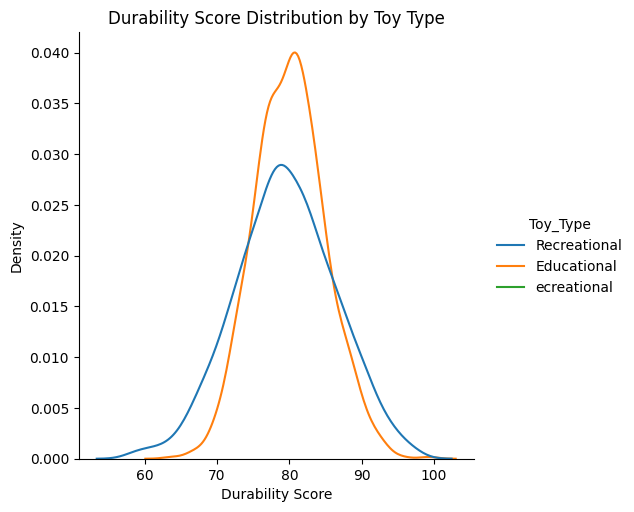

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the distribution of Durability_Score for each Toy_Type
sns.displot(
    data=toy_durability,
    x="Durability_Score",
    hue="Toy_Type",
    kind="kde"
)
plt.title('Durability Score Distribution by Toy Type')
plt.xlabel('Durability Score')
plt.ylabel('Density')
plt.show();

The KDE plot visually illustrates the differences in durability between Educational and Recreational toys. You can see that the center of both distributions is near 80 for the durability score, but Recreational seems more variable than Educational.

### Power analysis: sample and effect size

In [23]:
import statsmodels.stats.power as smsp
# Instantiate a TTestIndPower object
power_analysis = smsp.TTestIndPower()

# Conduct a power analysis to determine the required sample size
required_n = power_analysis.solve_power(
    effect_size=0.5, 
    alpha=0.05, 
    power=0.9, 
    ratio=1)

print(required_n)

85.03128688801546


## Advanced Insights from Experimental Complexity

### Synthesizing insights from complex experiments

#### Visualizing loan approval yield

In the realm of financial services, understanding the factors that influence loan approval rates is crucial for both lenders and borrowers. A financial institution has conducted a study and collected data on loan applications, detailing the amount requested, the applicant's credit score, employment status, and the ultimate yield of the approval process. This rich dataset offers a window into the nuanced dynamics at play in loan decision-making. You have been asked to dive into the loan_approval_yield dataset to understand how loan amounts and credit scores influence approval yields.

The loan_approval_yield DataFrame, seaborn as sns, and matplotlib.pyplot as plt have been loaded for you.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
loan_approval_yield = pd.read_csv(
    r'.\data\loan_approval_yield.csv',
    usecols=['ApplicationID', 'LoanAmount', 'CreditScore', 'EmploymentStatus', 'ApprovalYield']
)
customer_satisfaction = pd.read_csv(r'.\data\customer_satisfaction.csv')
loan_approval_yield.head(3)

,ApplicationID,LoanAmount,CreditScore,EmploymentStatus,ApprovalYield
0,1,High,Excellent,Unemployed,0.183435
1,2,Low,Poor,Self-Employed,0.445833
2,3,High,Good,Self-Employed,0.866176


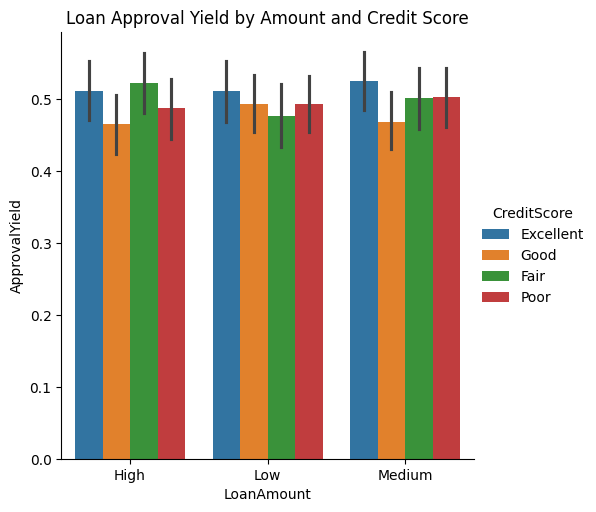

In [34]:
sns.catplot(
    data=loan_approval_yield,
    x='LoanAmount',
    y='ApprovalYield',
    hue='CreditScore',
    kind='bar',
    hue_order=['Excellent', 'Good', 'Fair', 'Poor']
)
plt.title('Loan Approval Yield by Amount and Credit Score')
plt.show();

In [35]:
# Merge the two datasets
merged_data = pd.merge(
    loan_approval_yield,
    customer_satisfaction,
    on='ApplicationID')
merged_data.head(3)

,ApplicationID,LoanAmount,CreditScore,EmploymentStatus,ApprovalYield,Unnamed: 0,ResponseTime,InterestRate,CustomerInteraction,SatisfactionQuality
0,1,High,Excellent,Unemployed,0.183435,0,Fast,Low,Poor,0.204979
1,2,Low,Poor,Self-Employed,0.445833,1,Moderate,High,Good,0.462610
2,3,High,Good,Self-Employed,0.866176,2,Slow,Medium,Average,0.874398


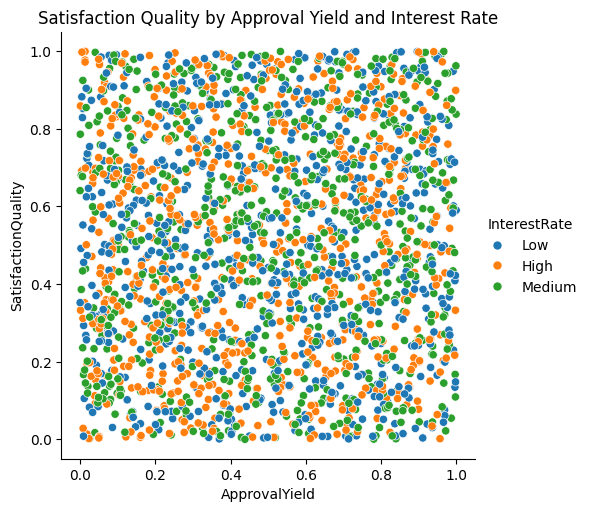

In [37]:
sns.relplot(
    data=merged_data,
    x='ApprovalYield',
    y='SatisfactionQuality',
    hue='InterestRate',
    kind='scatter'
)
plt.title("Satisfaction Quality by Approval Yield and Interest Rate")
plt.show();

The scatterplot does not demonstrate a strong relationship between Customer Satisfaction and Approval Yield, appearing more like white noise, which indicates that these variables do not strongly influence each other in this dataset.

### Addressing complexities in experimental data

In [40]:
food_preservation = pd.read_csv(r'.\data\food_preservation.txt', sep=',')
food_preservation.head(3)

,ProductID,PreservationMethod,FoodType,NutrientRetention,ShelfLife
0,1,Drying,Fruit,59.17,184.04
1,2,Freezing,Meat,72.29,104.46
2,3,Drying,Fruit,80.06,75.03


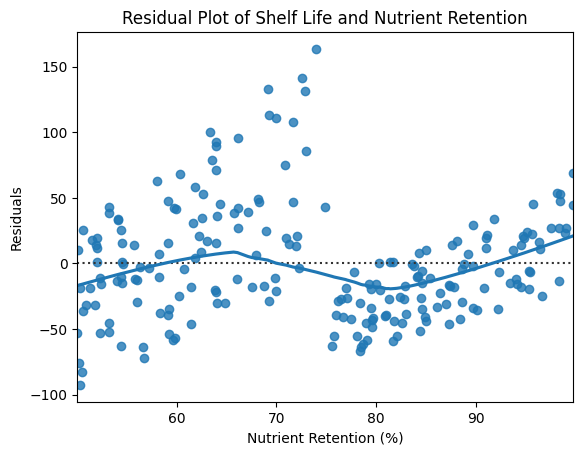

In [42]:
# Check for heteroscedasticity with a residual plot
sns.residplot(
    x='NutrientRetention',
    y='ShelfLife',
    data=food_preservation,
    lowess=True)
plt.title('Residual Plot of Shelf Life and Nutrient Retention')
plt.xlabel('Nutrient Retention (%)')
plt.ylabel('Residuals')
plt.show()

The residual plot allows you to visually assess the heteroscedasticity between nutrient retention and shelf life, showing if the spread of residuals changes across nutrient retention levels. You can see some deviation away from the 0 line, so there may be some concerns about heteroscedasticity.

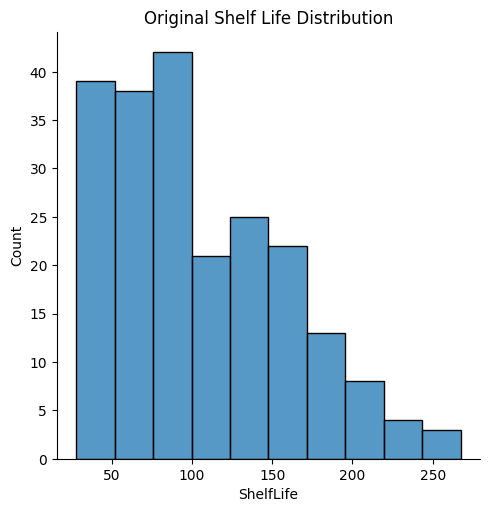

In [43]:
# Visualize the original ShelfLife distribution
sns.displot(food_preservation['ShelfLife'])
plt.title('Original Shelf Life Distribution')
plt.show()

<Figure size 640x480 with 0 Axes>

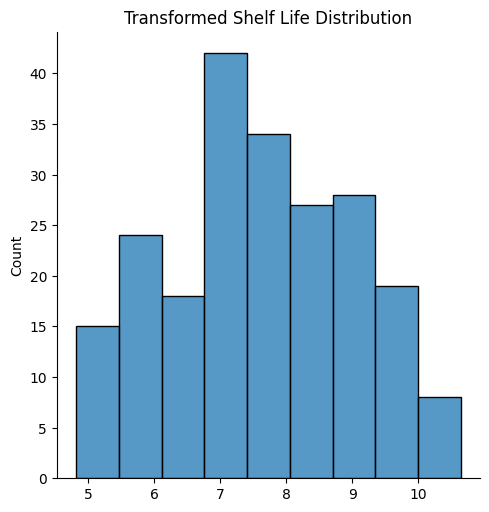

In [44]:
# Create a Box-Cox transformation
ShelfLifeTransformed, _ = scst.boxcox (food_preservation['ShelfLife'])

# Visualize the transformed ShelfLife distribution
plt.clf()
sns.displot(ShelfLifeTransformed)
plt.title('Transformed Shelf Life Distribution')
plt.show()

Visualizing the original and transformed distributions provides valuable insights into the data's structure. The Box-Cox transformation helps stabilize variance, making the data more suitable for further statistical analysis by helping to make the ShelfLife follow a more normal shape.

### Applying nonparametric tests in experimental analysis

#### Visualizing and testing preservation methods

As a food scientist, you're tasked with evaluating the effectiveness of different preservation methods on nutrient retention and how these methods impact shelf life. You have been provided with a dataset, food_preservation, that includes various types of food preserved by methods such as freezing and canning. Each entry in the dataset captures the nutrient retention and calculated shelf life for these foods, providing a unique opportunity to analyze the impacts of preservation techniques on food quality.

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scst

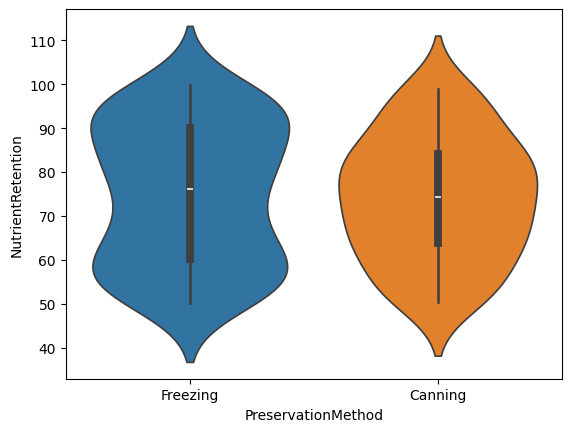

In [48]:
# Filter to Freezing and Canning data
condensed_food_data = food_preservation[food_preservation['PreservationMethod'].isin(['Freezing', 'Canning'])]

# Create a violin plot for nutrient retention by preservation method
sns.violinplot(
    data=condensed_food_data, 
    x="PreservationMethod", 
    y="NutrientRetention",
    hue='PreservationMethod'
)
plt.show()

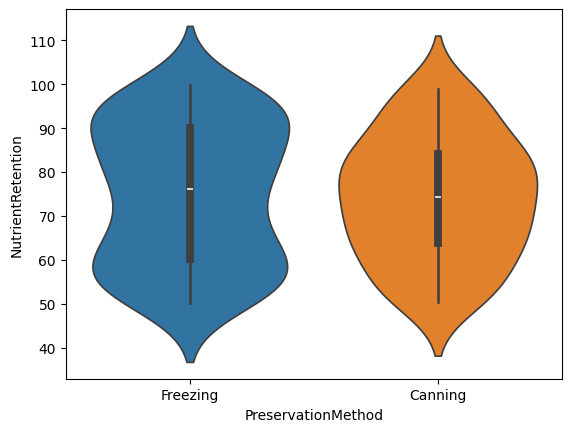

Mann Whitney U test p-value: 0.7211582066472636


In [50]:
# Filter to Freezing and Canning data
condensed_food_data = food_preservation[food_preservation['PreservationMethod'].isin(['Freezing', 'Canning'])]

# Create a violin plot for nutrient retention by preservation method
sns.violinplot(
    data=condensed_food_data,
    x="PreservationMethod", 
    y="NutrientRetention",
    hue='PreservationMethod'
)
plt.show()

# Separate nutrient retention for Freezing and Canning methods
freezing = food_preservation[food_preservation['PreservationMethod'] == 'Freezing']['NutrientRetention']
canning = food_preservation[food_preservation['PreservationMethod'] == 'Canning']['NutrientRetention']

# Perform Mann Whitney U test
u_stat, p_val = scst.mannwhitneyu( freezing, canning )

# Print the p-value
print("Mann Whitney U test p-value:", p_val)

The violin plot shows that the distribution and median values are similar across Freezing and Canning. The large p-value leads us to suspect that a statistical difference does not exist in the medians of nutrient retention for freezing versus canning preservation methods.

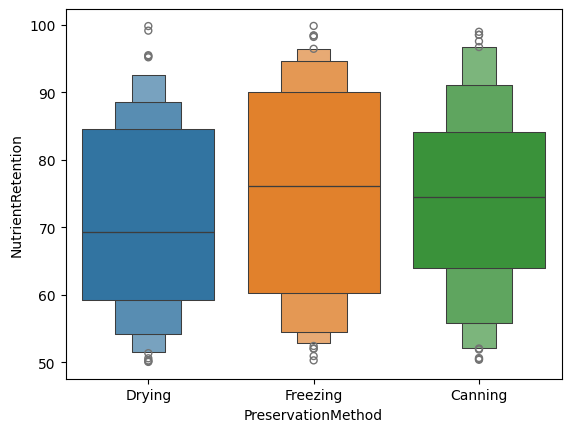

In [51]:
# Create a boxen plot for nutrient retention by preservation
sns.boxenplot(
    data=food_preservation, 
    x="PreservationMethod", 
    y="NutrientRetention",
    hue="PreservationMethod"
)
plt.show()

In [54]:
# Separate nutrient retention for each preservation method
freezing = food_preservation[food_preservation['PreservationMethod'] == 'Freezing']['NutrientRetention']
canning = food_preservation[food_preservation['PreservationMethod'] == 'Canning']['NutrientRetention']
drying = food_preservation[food_preservation['PreservationMethod'] == 'Drying']['NutrientRetention']

# Perform Kruskal-Wallis test
k_stat, k_pval = scst.kruskal(
    freezing, canning, drying
)
print("Kruskal-Wallis test p-value:", k_pval)

Kruskal-Wallis test p-value: 0.38534203658094596


By effectively visualizing and statistically analyzing the nutrient retention across different preservation methods, you've gained insights into how these methods impact food quality. The boxen plot provided a deeper understanding of the data's distribution, and the Kruskal-Wallis test helped you assess the statistical differences between groups. The large p-value leads us to fail to conclude that a difference in the median values across the three groups of preservation methods exists for nutrient retention.